## Topics
- Exploring Stock Data API
- Fteching and sorting out the data
- Creating data sets
- Building the model based on Linear Regression
- Training, testing, and using the model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tiingo
import quandl
import pandas_datareader.data as web

/Users/dennismacpro/miniconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
quandl.ApiConfig.api_key = 'zKYsMEfvyGrpJ-bk5J2V'

In [4]:
r = quandl.get('EOD/HD', start_date='2017-12-28', end_date='2017-12-28')
r.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2017-12-28,190.91,190.98,189.64,189.78,3175631.0,0.0,1.0,180.531515,180.59771,179.330556,179.462946,3175631.0


In [5]:
# https://docs.quandl.com/docs/python-time-series#section-make-a-filtered-time-series-call
aapl = quandl.get("WIKI/AAPL",start_date='2018-01-01',end_date='2020-05-01')

In [6]:
aapl.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-01-02,170.16,172.30,169.26,172.26,25048048.0,0.0,1.0,170.16,172.30,169.26,172.26,25048048.0
2018-01-03,172.53,174.55,171.96,172.23,28819653.0,0.0,1.0,172.53,174.55,171.96,172.23,28819653.0
2018-01-04,172.54,173.47,172.08,173.03,22211345.0,0.0,1.0,172.54,173.47,172.08,173.03,22211345.0
2018-01-05,173.44,175.37,173.05,175.00,23016177.0,0.0,1.0,173.44,175.37,173.05,175.00,23016177.0
2018-01-08,174.35,175.61,173.93,174.35,20134092.0,0.0,1.0,174.35,175.61,173.93,174.35,20134092.0


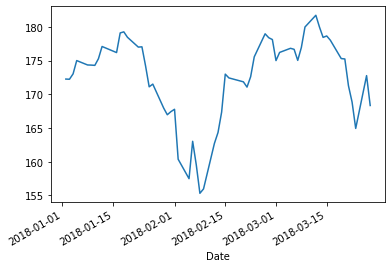

In [7]:
aapl['Adj. Close'].plot()

In [8]:
aapl['Daily Return'] = aapl['Adj. Close'].pct_change(1)

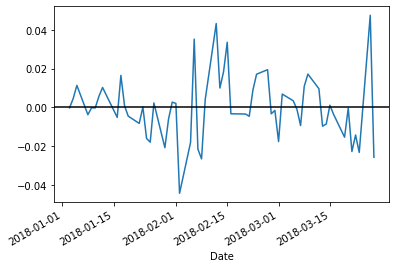

In [9]:
aapl['Daily Return'].plot();
plt.axhline(c='black')

In [10]:
# Simple CAPM Example
from scipy import stats

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
df = quandl.get("NSE/TATAGLOBAL", authtoken="zKYsMEfvyGrpJ-bk5J2V")

In [15]:
df.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-21,122.1,123.00,121.05,121.10,121.55,658666.0,803.56
2010-07-22,120.3,122.00,120.25,120.75,120.90,293312.0,355.17
2010-07-23,121.8,121.95,120.25,120.35,120.65,281312.0,340.31
2010-07-26,120.1,121.00,117.10,117.10,117.60,658440.0,780.01
2010-07-27,117.6,119.50,112.00,118.80,118.65,586100.0,694.98


In [16]:
# Turnover (Lacs) is the turnover of the particular company on a given date.

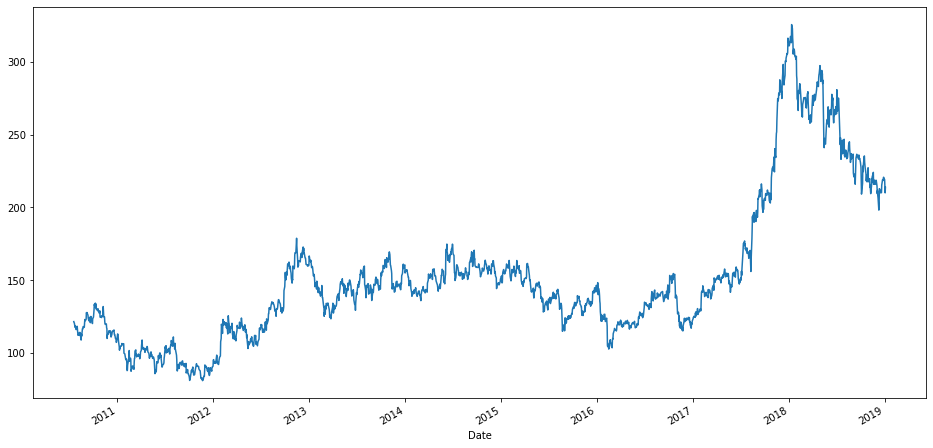

In [22]:
df['Close'].plot(label='Close Price History',figsize=(16,8));

In [23]:
# In the next section, we will look at two commonly used machine learning techniques – Linear Regression and kNN, and see how they perform on our stock market data.

In [27]:
data = df.sort_index(ascending=True, axis=0)
data.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-21,122.1,123.00,121.05,121.10,121.55,658666.0,803.56
2010-07-22,120.3,122.00,120.25,120.75,120.90,293312.0,355.17
2010-07-23,121.8,121.95,120.25,120.35,120.65,281312.0,340.31
2010-07-26,120.1,121.00,117.10,117.10,117.60,658440.0,780.01
2010-07-27,117.6,119.50,112.00,118.80,118.65,586100.0,694.98


In [25]:
new_data= pd.DataFrame(index=range(0,len(df)),columns=['Date','Clse'])